In [1]:
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
import geopandas
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut , GeocoderUnavailable , GeocoderInsufficientPrivileges
from sklearn.linear_model import LinearRegression
import time
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm




In [2]:
df = pd.read_csv('Initial_Breakdown_Plan.xlsx - Dataset.csv')

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Boomw\AppData\Local\Temp\ipykernel_18824\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [4]:
def get_coordinates(cities, country="UK"):
    geolocator = Nominatim(user_agent="geoapiExercises" , timeout=10)
    coordinates = {}

    for city in cities:
        city_query = f"{city}, {country}"
        try:
            location = geolocator.geocode(city_query)
            if location:
                coordinates[city] = (location.latitude, location.longitude)
            else:
                print(f"Could not get the location for {city}")
        except (GeocoderTimedOut, GeocoderInsufficientPrivileges) as e:
            print(f"Error: {e} for {city}")

    return coordinates



In [5]:
def choose_color(city):
    if city == 'London':
        return 'red'
    elif city == 'Belfast' or city == 'Birmingham':
        return 'orange'
    else:
        return 'green'


C:\Users\Boomw\AppData\Local\Temp\ipykernel_18824\217254784.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


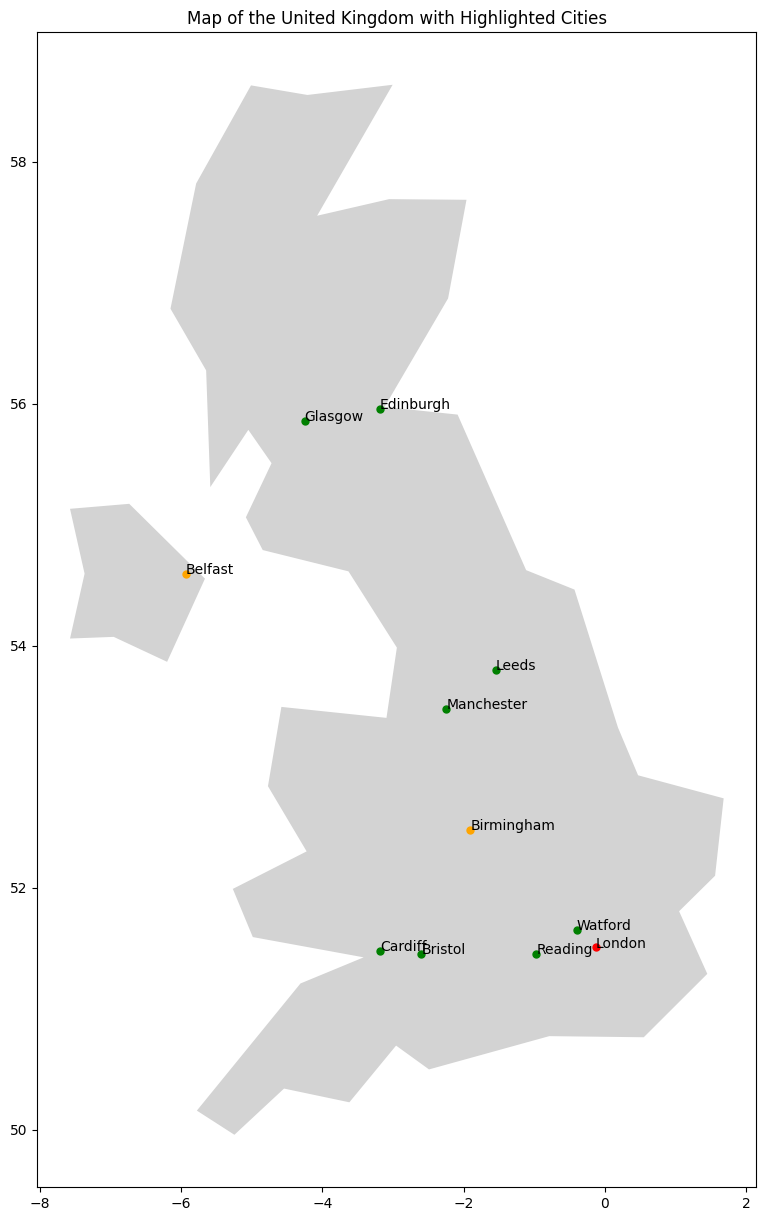

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the built-in Natural Earth dataset from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the dataset to only include the United Kingdom
uk = world[world['name'] == 'United Kingdom']

# Define the cities and their coordinates
cities = {'London': (51.5074456, -0.1277653),
 'Belfast': (54.596391, -5.9301829),
 'Reading': (51.4564242, -0.9700664),
 'Birmingham': (52.4796992, -1.9026911),
 'Leeds': (53.7974185, -1.5437941),
 'Bristol': (51.4538022, -2.5972985),
 'Manchester': (53.4794892, -2.2451148),
 'Watford': (51.6553875, -0.3957425),
 'Edinburgh': (55.9533456, -3.1883749),
 'Glasgow': (55.861155, -4.2501687),
 'Cardiff': (51.4816546, -3.1791934)}

# Create a figure with a specified size
fig, ax = plt.subplots(figsize=(10, 15))  # You can adjust the size as you like

# Plot the map of the United Kingdom
uk.plot(ax=ax, color='lightgray')

# Plot each city
for city, (lat, lon) in cities.items():
    ax.plot(lon, lat, marker='o', color=choose_color(city), markersize=5)
    ax.text(lon, lat, city, fontsize=10)

plt.title('Map of the United Kingdom with Highlighted Cities')
plt.show()


In [7]:
# Getting the amount of items purchased in each area
london = df[df['Location'] == 'London']
belfast = df[df['Location'] == 'Belfast']
reading = df[df['Location'] == 'Reading']
birmingham = df[df['Location'] == 'Birmingham']
leeds = df[df['Location'] == 'Leeds']
bristol = df[df['Location'] == 'Bristol']
manchester = df[df['Location'] == 'Manchester']
watford = df[df['Location'] == 'Watford']
edinburgh = df[df['Location'] == 'Edinburgh']
glasgow  = df[df['Location'] == 'Glasgow']
cardiff  = df[df['Location'] == 'Cardiff']

In [8]:
len_of_city_array = [len(london) , len(belfast) , len(reading),
                         len(birmingham) , len(leeds) , len(bristol),
                         len(manchester) , len(watford) , len(edinburgh),
                         len(glasgow) , len(cardiff)]

cities = ['London', 'Belfast' , 'Reading' , 'Birmingham' , 'Leeds' , 'Bristol' , 'Manchester' , 'Watford' , 'Edinburgh' , 'Glasgow' , 'Cardiff']

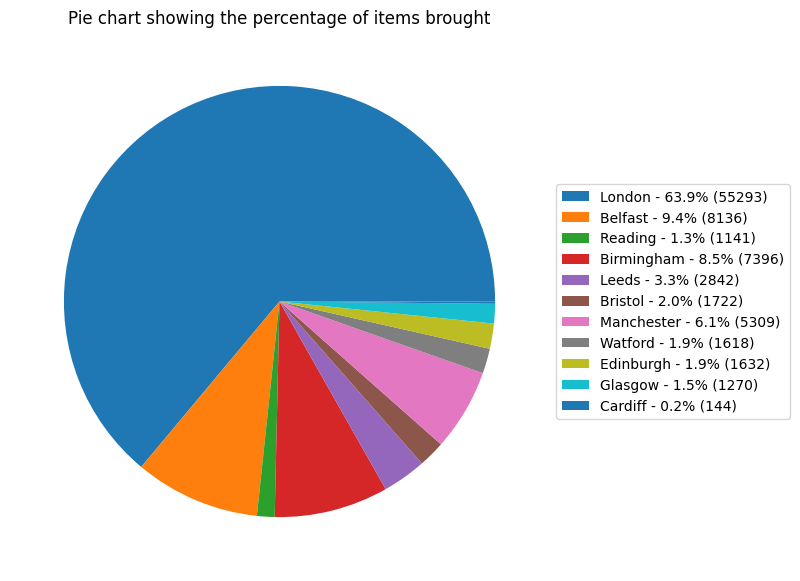

In [9]:

# Calculate the percentage for each city
percentages = [100. * amount / sum(len_of_city_array) for amount in len_of_city_array]

# Creating the pie chart without displaying percentages on the chart itself
plt.figure(figsize=(14, 7))
wedges, texts = plt.pie(len_of_city_array)

# Create custom labels for the legend, combining city names with their respective percentages and values
legend_labels = [f'{city} - {percentage:.1f}% ({value})' for city, percentage, value in zip(cities, percentages, len_of_city_array)]

# Adding the legend with custom labels
plt.legend(wedges, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Pie chart showing the percentage of items brought')
plt.show()


In [10]:
london_avg_money_spent = np.mean(london['Cost'])
belfast_avg_money_spent = np.mean(belfast['Cost'])
reading_avg_money_spent = np.mean(reading['Cost'])
birmingham_avg_money_spent = np.mean(birmingham['Cost'])
leeds_avg_money_spent = np.mean(leeds['Cost'])
bristol_avg_money_spent = np.mean(bristol['Cost'])
manchester_avg_money_spent = np.mean(manchester['Cost'])
watford_avg_money_spent = np.mean(watford['Cost'])
edinburgh_avg_money_spent = np.mean(edinburgh['Cost'])
glasgow_avg_money_spent = np.mean(glasgow['Cost'])
cardiff_avg_money_spent = np.mean(cardiff['Cost'])


In [11]:
london_Item_Desc = london['Item Desc']
belfast_Item_Desc = belfast['Item Desc']
reading_Item_Desc = reading['Item Desc']
birmingham_Item_Desc = birmingham['Item Desc']
leeds_Item_Desc = leeds['Item Desc']
bristol_Item_Desc = bristol['Item Desc']
manchester_Item_Desc = manchester['Item Desc']
watford_Item_Desc = watford['Item Desc']
edinburgh_Item_Desc = edinburgh['Item Desc']
glasgow_Item_Desc = glasgow ['Item Desc']
cardiff_Item_Desc = cardiff ['Item Desc']

In [12]:
london_Cost_Center = london['Cost Center Level 5']
belfast_Cost_Center = belfast['Cost Center Level 5']
reading_Cost_Center = reading['Cost Center Level 5']
birmingham_Cost_Center = birmingham['Cost Center Level 5']
leeds_Cost_Center = leeds['Cost Center Level 5']
bristol_Cost_Center = bristol['Cost Center Level 5']
manchester_Cost_Center = manchester['Cost Center Level 5']
watford_Cost_Center = watford['Cost Center Level 5']
edinburgh_Cost_Center = edinburgh['Cost Center Level 5']
glasgow_Cost_Center = glasgow['Cost Center Level 5']  
cardiff_Cost_Center = cardiff['Cost Center Level 5']   


In [13]:
Item_Desc_array = [london_Item_Desc,
belfast_Item_Desc,
reading_Item_Desc,
birmingham_Item_Desc,
leeds_Item_Desc,
bristol_Item_Desc,
manchester_Item_Desc,
watford_Item_Desc,
edinburgh_Item_Desc,
glasgow_Item_Desc,
cardiff_Item_Desc]

In [14]:
cost_center_array = [len(london_Cost_Center),
belfast_Cost_Center,
reading_Cost_Center,
birmingham_Cost_Center,
leeds_Cost_Center,
bristol_Cost_Center,
manchester_Cost_Center,
watford_Cost_Center,
edinburgh_Cost_Center,
glasgow_Cost_Center, 
cardiff_Cost_Center]

In [15]:
avg_money_spent_array = [london_avg_money_spent , belfast_avg_money_spent , reading_avg_money_spent , birmingham_avg_money_spent,
                         leeds_avg_money_spent , bristol_avg_money_spent , manchester_avg_money_spent , watford_avg_money_spent,
                        edinburgh_avg_money_spent , glasgow_avg_money_spent , cardiff_avg_money_spent]

<BarContainer object of 11 artists>

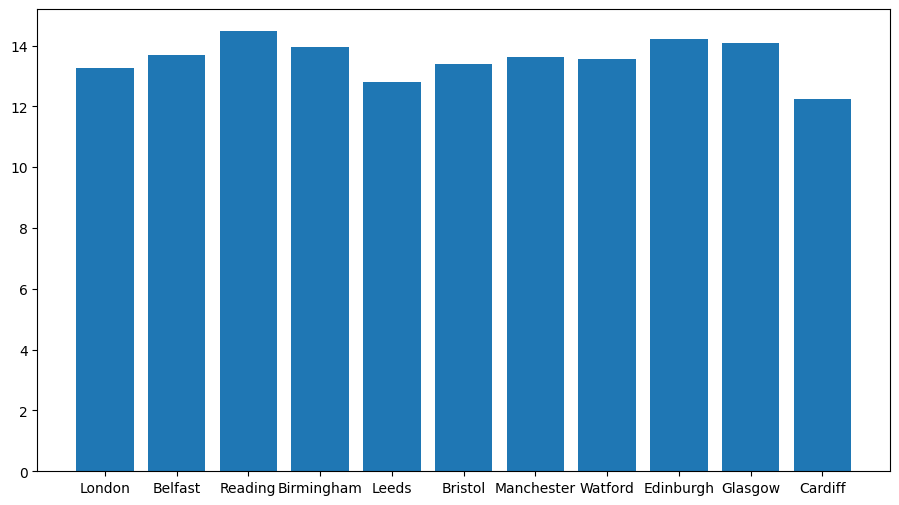

In [16]:
plt.figure(figsize=(11, 6))
plt.bar(cities , avg_money_spent_array)

In [17]:
df_machine = df['Machine']
unique_machine = df_machine.unique()

In [18]:
# Arrays to hold the separated values
london_belfast_city = [place for place in unique_machine if place.startswith("London") or place.startswith("Belfast")]
other_city = [place for place in unique_machine if not (place.startswith("London") or place.startswith("Belfast"))]


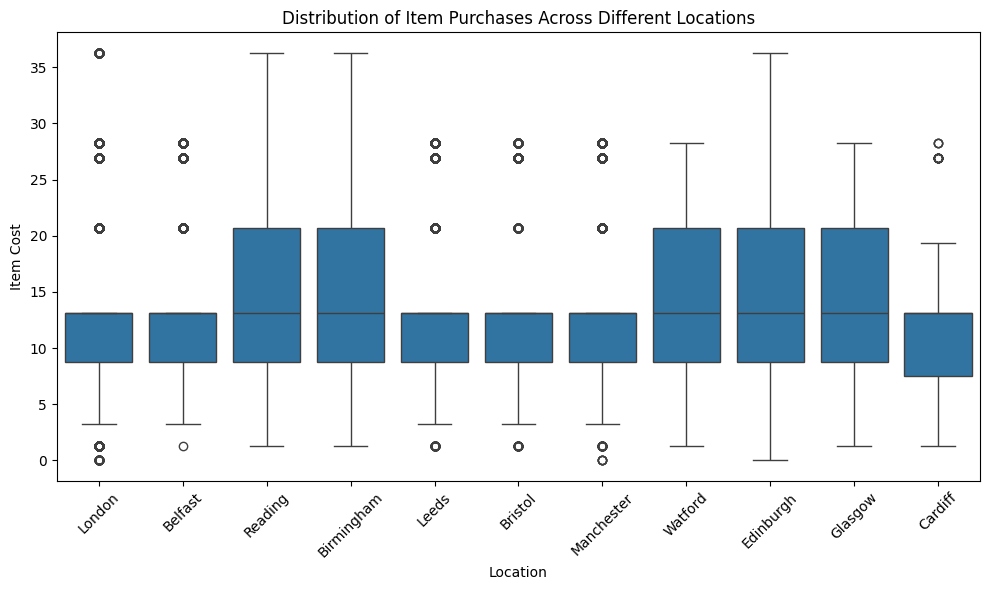

In [19]:
#This needs to be changed to a normal distribution graph
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# df should have columns: 'Location' and 'Cost' or any other column representing the quantity of items bought

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Location', y='Cost')
plt.xlabel('Location')
plt.ylabel('Item Cost')
plt.title('Distribution of Item Purchases Across Different Locations')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

In [20]:
np.average(london['Cost'])

13.263668457128391

Doing the sairma model

In [21]:
def items_per_day(df):
    # Ensure 'Date' is a datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract just the date part from the 'Date' column
    df['Just_Date'] = df['Date'].dt.date

    # Group by the date and count the occurrences
    daily_counts = df.groupby('Just_Date').size().reset_index(name='Counts')
    
    
    return daily_counts


In [22]:
items_per_day = items_per_day(df)
items_per_day = items_per_day.drop(items_per_day.index[0])


In [23]:
def draw_time_graph(df):
    
    # Now plot the 'items_brought' Series
    plt.figure(figsize=(10, 5))  # Set the figure size (optional)
    plt.plot(df['Just_Date'] , df['Counts'])  # Plot the data
    
    # Customizing the plot
    plt.title('Time Series')
    plt.xlabel('Date')
    plt.ylabel('Items Purchased')
    plt.legend()

    # Rotate date labels for better readability (optional)
    plt.xticks(rotation=45)
    
    # Set the y-axis to start from the minimum value of 'Items Purchased' or any other desired value


In [24]:
with open('array_contents.txt', 'w') as f:
    for item in items_per_day['Counts']:
        f.write("%s\n" % item)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


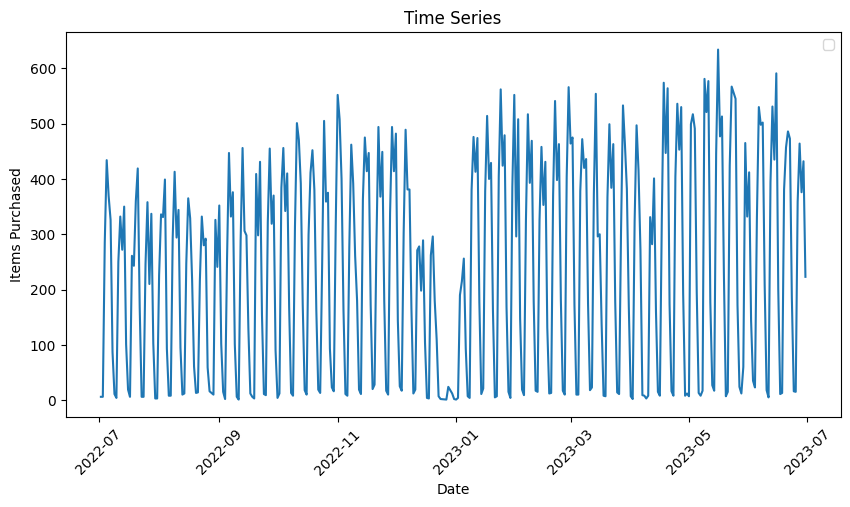

In [25]:
draw_time_graph(items_per_day)

In [26]:
def adfuller_test(items_purchased):
    result=adfuller(items_purchased)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [27]:
adfuller_test(items_per_day['Counts'])

ADF Test Statistic : -3.2885999961311962
p-value : 0.015395809183532297
#Lags Used : 14
Number of Observations Used : 347
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [28]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [29]:
stepwise_fit = auto_arima(items_per_day['Counts']
                          ,trace = True , suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4445.245, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4795.234, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4785.517, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4782.879, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4793.238, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4384.736, Time=0.51 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4480.861, Time=0.39 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=4442.826, Time=0.72 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4400.759, Time=1.08 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=4424.928, Time=0.76 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=4390.233, Time=1.16 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=4382.5

In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [37]:
train = items_per_day['Counts'].iloc[:-30]
test = items_per_day['Counts'].iloc[-30:]
print(train.shape , test.shape)

(332,) (30,)


In [39]:
train.

1        6
2        6
3      285
4      434
5      369
      ... 
328     24
329     12
330     60
331    465
332    332
Name: Counts, Length: 332, dtype: int64

In [40]:
from statsmodels.tsa.arima.model import ARIMA
# Now fit the ARIMA model
model = ARIMA(train, order=(3, 1, 4))
results = model.fit()
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                 Counts   No. Observations:                  332
Model:                 ARIMA(3, 1, 4)   Log Likelihood               -1989.165
Date:                Tue, 16 Apr 2024   AIC                           3994.331
Time:                        08:59:42   BIC                           4024.748
Sample:                             0   HQIC                          4006.463
                                - 332                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3085      0.389      3.363      0.001       0.546       2.071
ar.L2         -1.0729      0.485     -2.212      0.027      -2.024      -0.122
ar.L3          0.0596      0.387      0.154      0.8

In [41]:
start = len(train)
end = len(train) + len(test) -1
pred=results.predict(start = start , end = end, typ = 'levels')
pred.index = items_per_day['Just_Date'][start:end+1]
print(pred)

Just_Date
2023-06-01    340.973850
2023-06-02     64.875646
2023-06-03   -123.428039
2023-06-04   -115.661457
2023-06-05     80.077498
2023-06-06    316.642727
2023-06-07    416.637961
2023-06-08    305.334313
2023-06-09     66.509544
2023-06-10   -120.610588
2023-06-11   -115.851689
2023-06-12     76.903128
2023-06-13    312.861142
2023-06-14    415.084281
2023-06-15    307.169433
2023-06-16     70.352331
2023-06-17   -117.643875
2023-06-18   -115.983366
2023-06-19     73.776865
2023-06-20    309.088576
2023-06-21    413.494276
2023-06-22    308.950214
2023-06-23     74.163529
2023-06-24   -114.662363
2023-06-25   -116.065023
2023-06-26     70.698290
2023-06-27    305.325625
2023-06-28    411.868669
2023-06-29    310.676937
2023-06-30     77.942762
Name: predicted_mean, dtype: float64


In [47]:
def draw_time_graph(df):
    
    # Now plot the 'items_brought' Series
    plt.figure(figsize=(10, 5))  # Set the figure size (optional)
    plt.plot(df['Just_Date'] , df['Counts'])  # Plot the data
    
    # Customizing the plot
    plt.title('Time Series')
    plt.xlabel('Date')
    plt.ylabel('Items Purchased')
    plt.legend()

    # Rotate date labels for better readability (optional)
    plt.xticks(rotation=45)
    
    # Set the y-axis to start from the minimum value of 'Items Purchased' or any other desired value


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


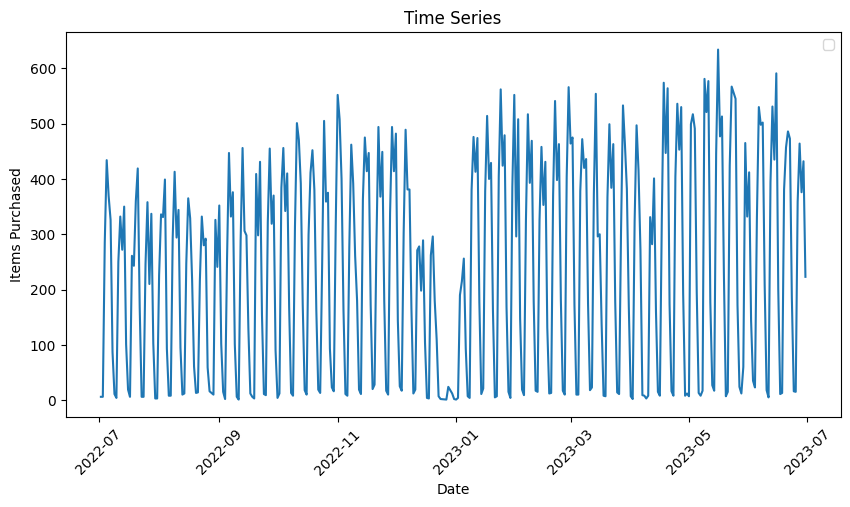

In [48]:
draw_time_graph(items_per_day)

In [46]:
items_per_day

,Just_Date,Counts
1,2022-07-02,6
2,2022-07-03,6
3,2022-07-04,285
4,2022-07-05,434
5,2022-07-06,369
...,...,...
358,2023-06-26,359
359,2023-06-27,464
360,2023-06-28,376
361,2023-06-29,432
